<center>
    <h1 id='custom-convnets' style='color:#7159c1'>👁️‍🗨️ Custom Convnets 👁️‍🗨️</h1>
    <i>Repeating the Features Extraction Over and Over Again</i>
</center>

---

In the last three lessons, we saw how convolutional networks perform feature extraction through three operations: FILTER (convolution), DETECT (relu) andCONDENSE (maximum pooling).

A single round of feature extraction can only extract relatively simple features from an image, things like simple lines or contrasts. These are too simple to solve most classification problems. Instead, convnets will repeat this extraction over and over, so that the features become more complex and refined as they travel deeper into the network.

In [9]:
# ---- Importations ----
import os, warnings # pip install os warnings
import matplotlib.pyplot as plt # pip install matplotlib
from matplotlib import gridspec
import mplcyberpunk # pip install mplcyberpunk

import numpy as np # pip install numpy
import tensorflow as tf # pip install tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # pip install pandas

# ---- Reproducability ----
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# ---- Setting Matplotlib Defaults ----
plt.rc('figure', autolayout=True)
plt.rc(
    'axes'
    , labelweight='bold'
    , labelsize='large'
    , titleweight='bold'
    , titlesize=18
    , titlepad=10
)
plt.rc('image', cmap='magma')
plt.style.use('cyberpunk')
warnings.filterwarnings("ignore")

In [5]:
# ---- Preparing Datasets ----
train_df = image_dataset_from_directory(
    './datasets/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

valid_df = image_dataset_from_directory(
    './datasets/car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# ---- Pipeline ----
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_df = (
    train_df
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

valid_df = (
    valid_df
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [6]:
# ---- Creating the Model ----
model = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(
        filters=32
        , kernel_size=5
        , activation="relu"
        , padding='same',
        # give the input dimensions in the first layer
        # [height, width, color channels(RGB)]
        input_shape=[128, 128, 3]
    ),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [8]:
# ---- Training the Model ----
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

history = model.fit(
    train_df,
    validation_data=valid_df,
    epochs=2,
    # epochs=40
    verbose=1,
)

Epoch 1/2
80/80 [==============================] - 176s 2s/step - loss: 0.6822 - binary_accuracy: 0.5783 - val_loss: 0.6781 - val_binary_accuracy: 0.5785
Epoch 2/2
80/80 [==============================] - 162s 2s/step - loss: 0.6691 - binary_accuracy: 0.5787 - val_loss: 0.6622 - val_binary_accuracy: 0.5785


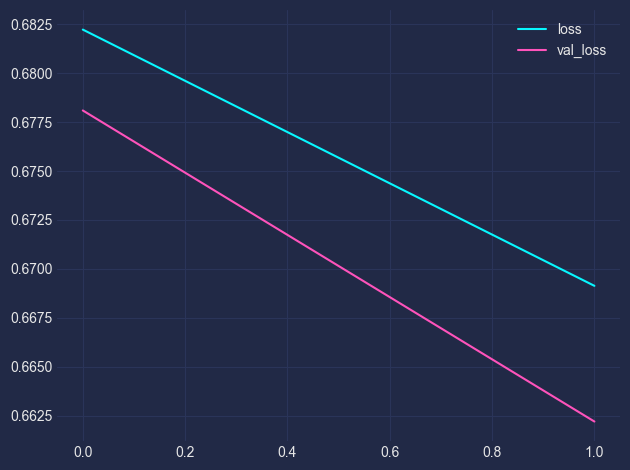

In [11]:
# ---- Evaluating the Model - Loss ----
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.show()

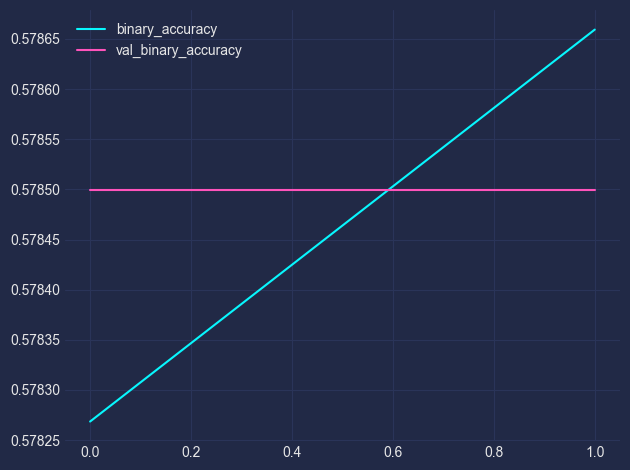

In [12]:
# ---- Evaluating the Model - Binary Accuracy ----
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
plt.show()

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).